In [1]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import math
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Using CAMB 1.5.2 installed at /Users/ikumakiyoshi/.julia/conda/3/lib/python3.10/site-packages/camb


In [2]:
nside = 2**2

In [3]:
#Set up a new set of parameters for CAMB
pars = camb.read_ini('params_camb_for_PTEP.ini')
#Set WantTensors to True
pars.WantTensors = True
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=1)
pars.set_for_lmax(3*nside + 1, lens_potential_accuracy=0)
random_seed = 5123
pars.RandomSeed = random_seed;

In [4]:
#calculate results for these parameters
results = camb.get_results(pars)

#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, lmax = 3*nside + 1, CMB_unit='muK', raw_cl=True)
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [5]:
cl_scal = powers['unlensed_scalar']
cl_tens = powers['tensor']
cl_lens = powers['lensed_scalar']
cl_pot = powers['lens_potential']
cl_total = powers['total']

r = 0

cl = cl_scal + r * cl_tens + cl_lens

#without lense
#cl = cl_scal + r * cl_tens

In [6]:
import healpy as hp
seed = 12345
np.random.seed(seed)
cmb_map = hp.synfast(cl.T, nside, new = True)

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
N_pix = hp.nside2npix(nside)

In [9]:
CMB = pysm3.Sky(nside, preset_strings=["c1"])

In [10]:
map_CMB_140GHz = CMB.get_emission(140 * u.GHz)

In [11]:
map_CMB_140GHz = map_CMB_140GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(140*u.GHz))

In [12]:
I = np.ones(N_pix)

Input_map = [I, map_CMB_140GHz[1], map_CMB_140GHz[2]]

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
Input_map_cl = hp.sphtfunc.anafast(map_CMB_140GHz)
Input_map_cl_1 = hp.sphtfunc.anafast(Input_map)

Input_map_cl_cmab = hp.sphtfunc.anafast(cmb_map)

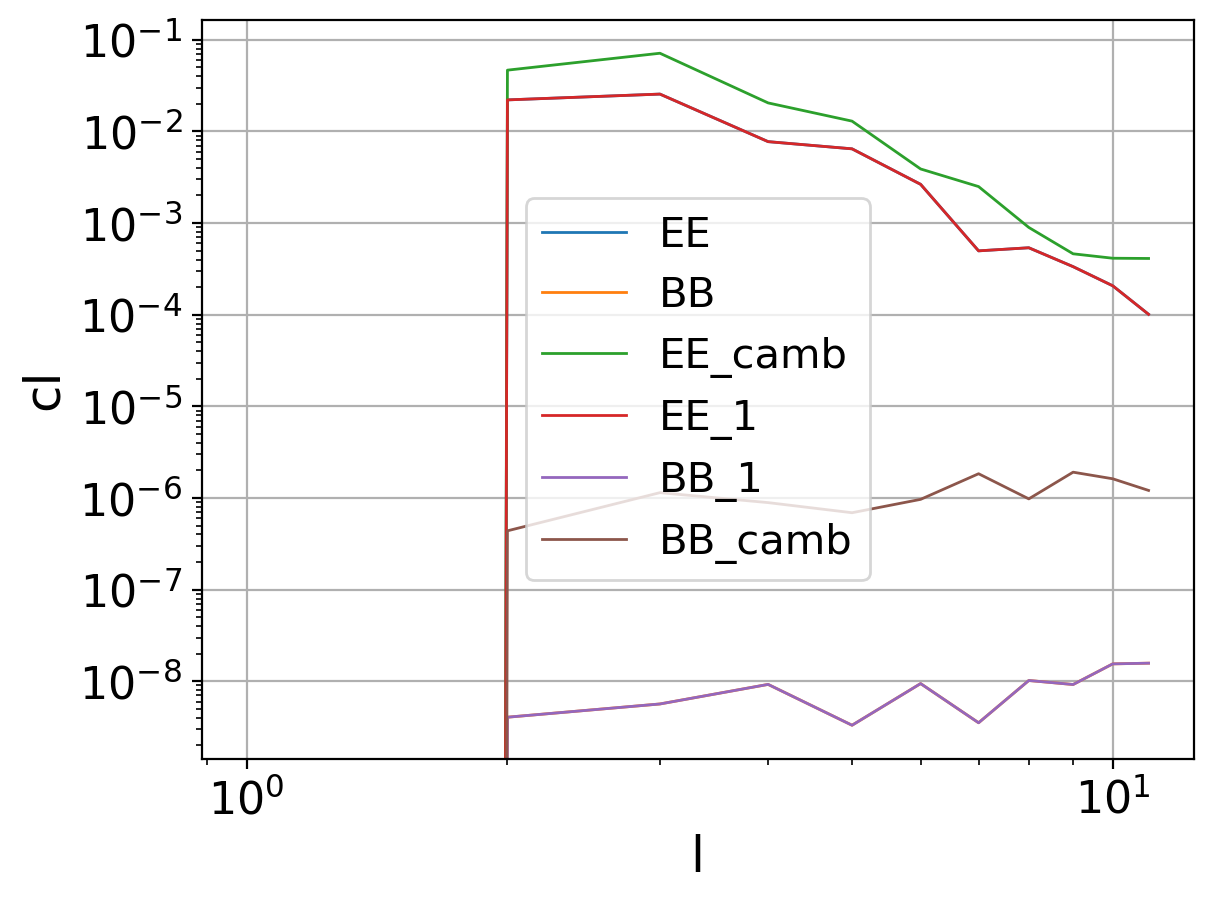

In [15]:
import matplotlib.pyplot as plt
import math

l = np.arange(0, 3*nside, 1)

Input_map_cl = Input_map_cl
#plot#
fig = plt.figure()

#plt.loglog(l, Input_map_cl[0], lw = 1, label="TT")
plt.loglog(l, Input_map_cl[1], lw = 1, label="EE")
plt.loglog(l, Input_map_cl[2], lw = 1, label="BB")
plt.loglog(l, Input_map_cl_cmab[1], lw = 1, label="EE_camb")


plt.loglog(l, Input_map_cl_1[1], lw = 1, label="EE_1")
plt.loglog(l, Input_map_cl_1[2], lw = 1, label="BB_1")
plt.loglog(l, Input_map_cl_cmab[2], lw = 1, label="BB_camb")

plt.xlabel("l", fontsize=18)
plt.ylabel("cl" ,fontsize=18)

#plt.xlim(0,10**2)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid()
plt.legend(fontsize=15)

plt.savefig('Modulation.png', bbox_inches='tight')
plt.show()

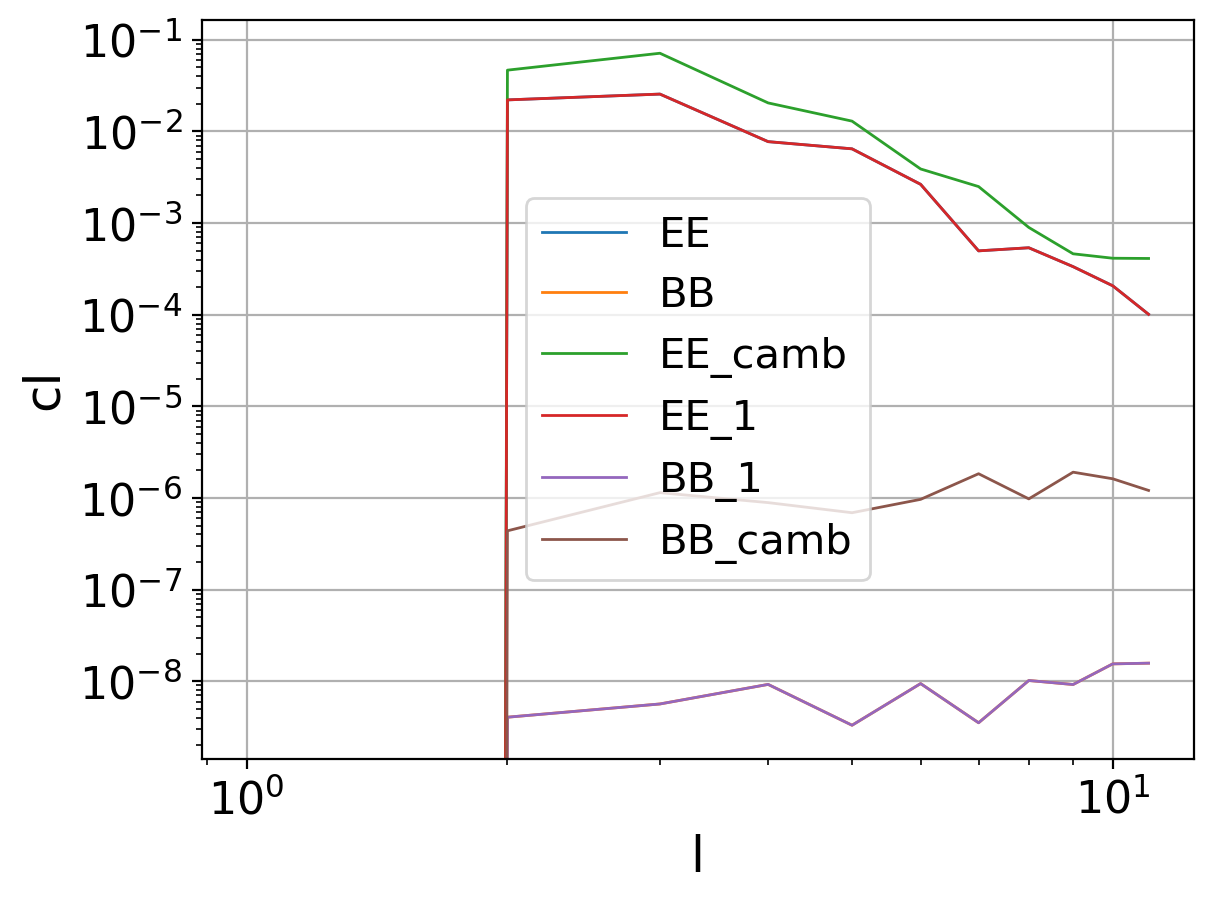

In [26]:
import matplotlib.pyplot as plt
import math

l = np.arange(0, 3*nside, 1)

Input_map_cl = Input_map_cl
#plot#
fig = plt.figure()

#plt.loglog(l, Input_map_cl[0], lw = 1, label="TT")
plt.loglog(l, Input_map_cl[1], lw = 1, label="EE")
plt.loglog(l, Input_map_cl[2], lw = 1, label="BB")
plt.loglog(l, Input_map_cl_cmab[1], lw = 1, label="EE_camb")


plt.loglog(l, Input_map_cl_1[1], lw = 1, label="EE_1")
plt.loglog(l, Input_map_cl_1[2], lw = 1, label="BB_1")
plt.loglog(l, Input_map_cl_cmab[2], lw = 1, label="BB_camb")

plt.xlabel("l", fontsize=18)
plt.ylabel("cl" ,fontsize=18)

#plt.xlim(0,10**2)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid()
plt.legend(fontsize=15)

plt.savefig('Modulation.png', bbox_inches='tight')
plt.show()